<h1 style="color: green">Explore the data<h1>

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
print('keys of digit dataset: \n{}'.format(digits.keys()))
print('................................................')
print('data that we want to predict: {}'.format(digits['target_names']))
print('................................................')
print('description of each feature: \n{}'.format(digits['feature_names']))

keys of digit dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
................................................
data that we want to predict: [0 1 2 3 4 5 6 7 8 9]
................................................
description of each feature: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'p

In [5]:
print('data array type: {}'.format(type(digits['data'])))
print('data shape: {}'.format(digits['data'].shape))
digits['data'][:150]

data array type: <class 'numpy.ndarray'>
data shape: (1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ..., 10.,  1.,  0.],
       [ 0.,  0.,  6., ...,  9.,  1.,  0.]])

In [8]:
print('target array type: {}'.format(type(digits['target'])))
print('target shape: {}'.format(digits['target'].shape))
print('answers (predictable vals): {}'.format(digits['target']))

target array type: <class 'numpy.ndarray'>
target shape: (1797,)
answers (predictable vals): [0 1 2 ... 8 9 8]


<h1 style="color: green">Dividing the data into training and test sets<h1>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], random_state=0)

In [10]:
print('X_train array shape: {}'.format(X_train.shape))
print('y_train array shape: {}'.format(y_train.shape))
print('................................................')
print('X_test array shape: {}'.format(X_test.shape))
print('y_test array shape: {}'.format(y_test.shape))

X_train array shape: (1347, 64)
y_train array shape: (1347,)
................................................
X_test array shape: (450, 64)
y_test array shape: (450,)


In [56]:
# convert in df
import pandas as pd

x = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target, columns=['target'])

<h1 style="color: green">Exploring data using visualization. Selecting the necessary params
graphs<h1>

In [57]:
# preprocessing involves subtracting the mean from each column
x=x.sub(x.mean(axis=0), axis=1)
x=x.values

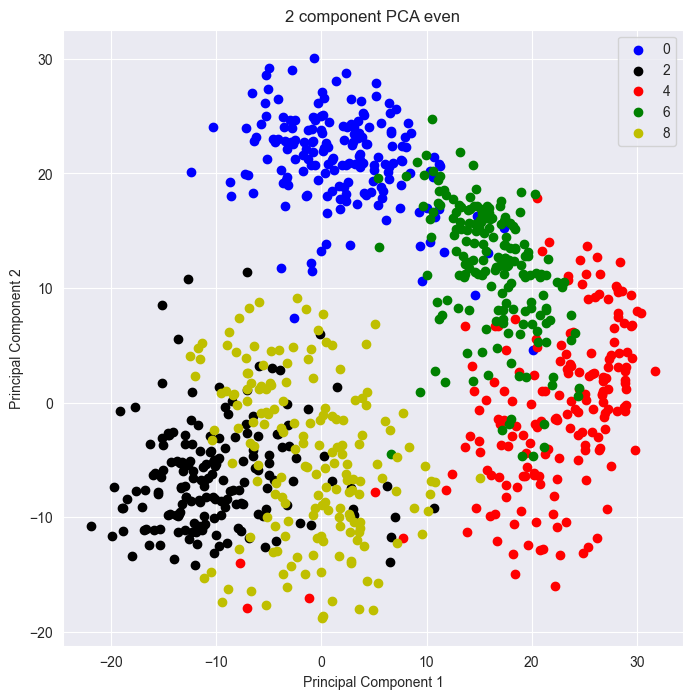

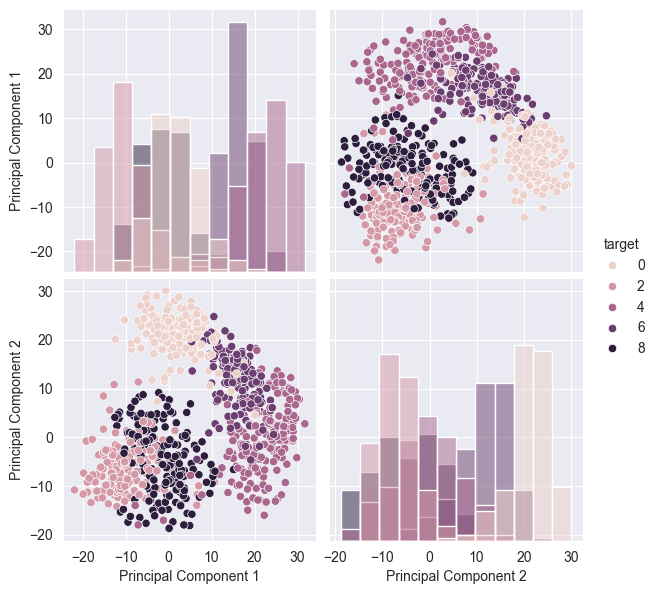

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# selecting 2 component PCA
pca = PCA(n_components=2)
# fit the model with X and apply the dimensionality reduction on x
principle_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principle_components, columns=['Principal Component 1', 'Principal Component 2'])
# creating a df for the target labels
# concatenating principal components with y (digits.target)
final_df = pd.concat([pca_df, y], axis=1)

# plotting even digits 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA even')

targets = [0, 2, 4, 6, 8]
colors = ['b', 'black', 'r', 'g', 'y']

for target, color in zip(targets, colors):
    # it plots the points from the df where the 'target' column matches the current target.
    ind = (final_df['target'] == target)
    ax.scatter(final_df.loc[ind, 'Principal Component 1']
               , final_df.loc[ind, 'Principal Component 2']
               , c=color)
ax.legend(targets)

# scatter matrix for even digits 
even_df = final_df[final_df['target'].isin([0, 2, 4, 6, 8])]
sns.pairplot(even_df, hue='target', height=3, diag_kind='hist')
plt.show()

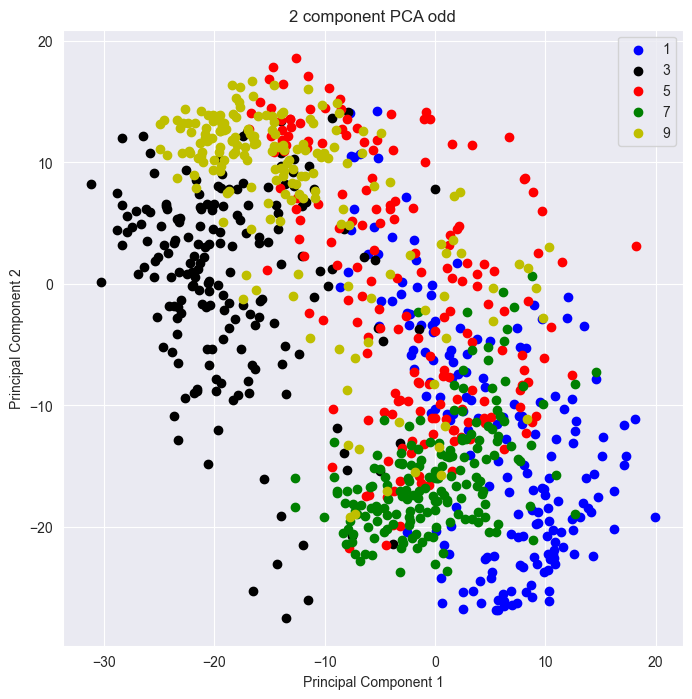

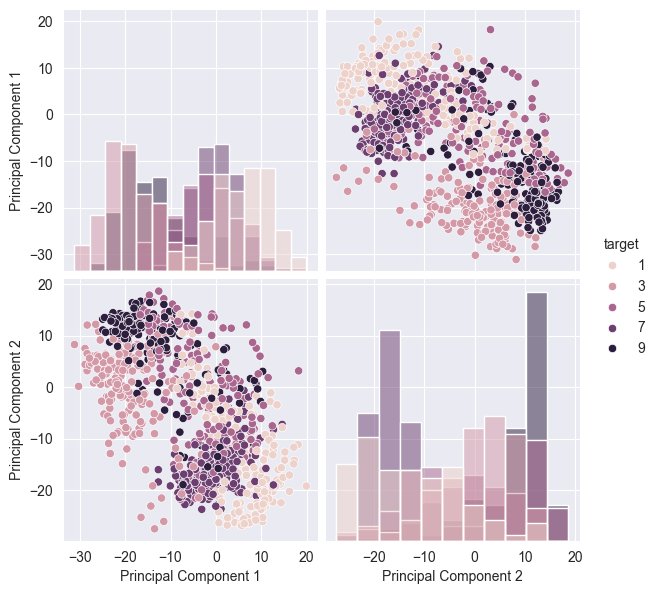

In [67]:
# plotting odd digits 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA odd')

targets = [1, 3, 5, 7, 9]
colors = ['b', 'black', 'r', 'g', 'y']

for target, color in zip(targets, colors):
    # it plots the points from the df where the 'target' column matches the current target.
    ind = (final_df['target'] == target)
    ax.scatter(final_df.loc[ind, 'Principal Component 1']
               , final_df.loc[ind, 'Principal Component 2']
               , c=color)
ax.legend(targets)

# scatter matrix for odd digits 
odd_df = final_df[final_df['target'].isin([1, 3, 5, 7, 9])]
sns.pairplot(odd_df, hue='target', height=3, diag_kind='hist')
plt.show()

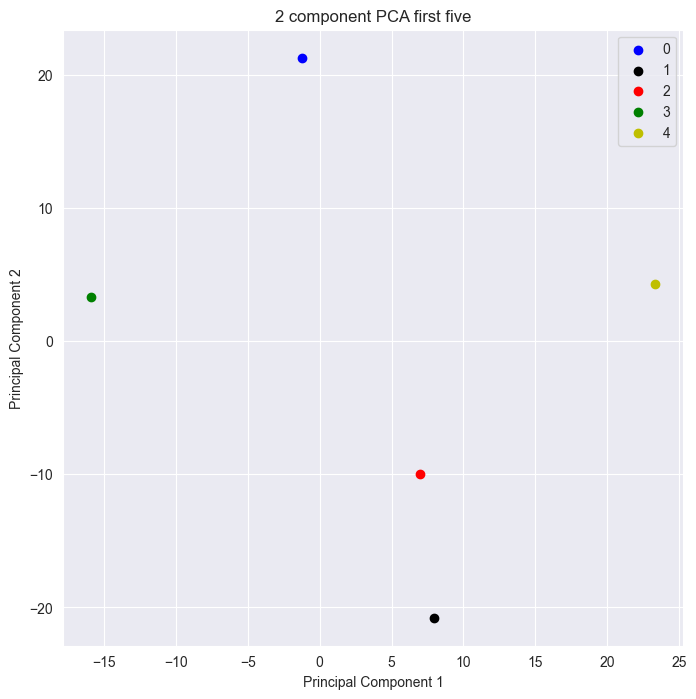

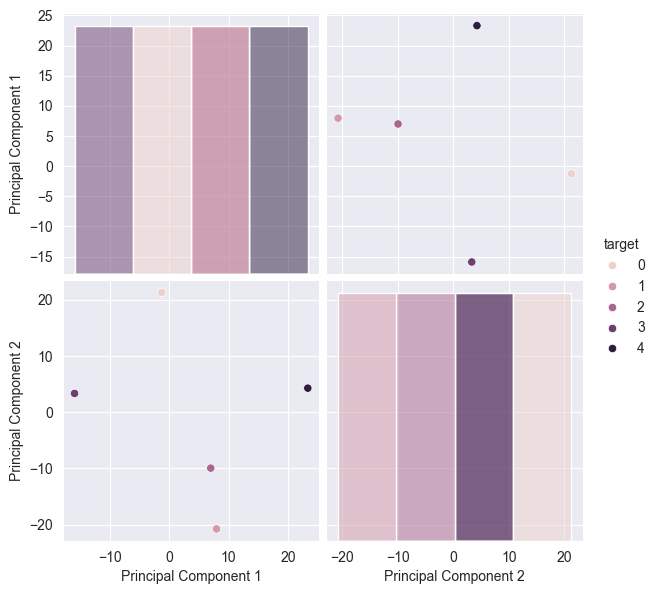

In [68]:
# plot first 5 digits
first_five_digits = final_df.head(5)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA first five')

targets = [0, 1, 2, 3, 4]
colors = ['b', 'black', 'r', 'g', 'y']
for target, color in zip(targets, colors):
    ind = (first_five_digits['target'] == target)
    ax.scatter(first_five_digits.loc[ind, 'Principal Component 1']
               , first_five_digits.loc[ind, 'Principal Component 2']
               , c=color)
ax.legend(targets)

# scatter matrix for first five digits 
sns.pairplot(first_five_digits, hue='target', height=3, diag_kind='hist')
plt.show()

In [62]:
last_five_digits = final_df.tail(5)
last_five_digits

,Principal Component 1,Principal Component 2,target
1792,-14.606634,13.344113,9
1793,6.464577,20.567303,0
1794,10.801291,-6.960236,8
1795,-4.872108,12.423947,9
1796,-0.344373,6.365584,8


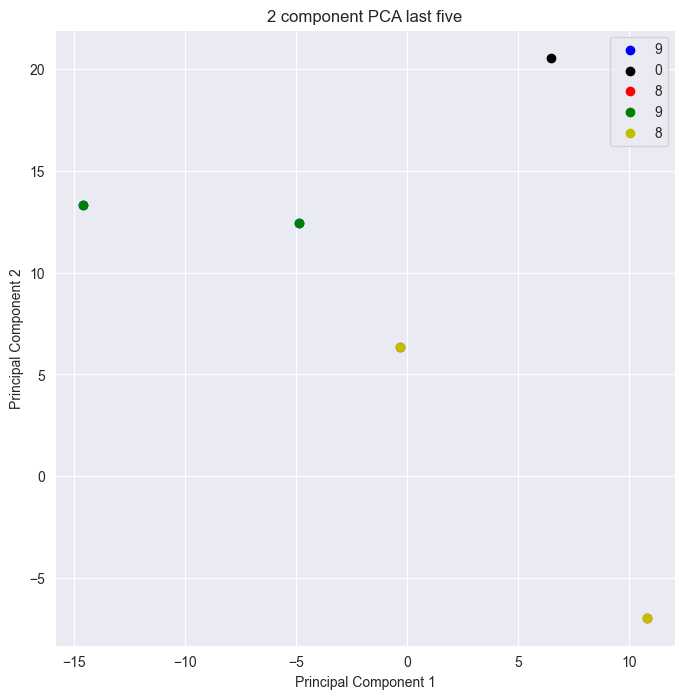

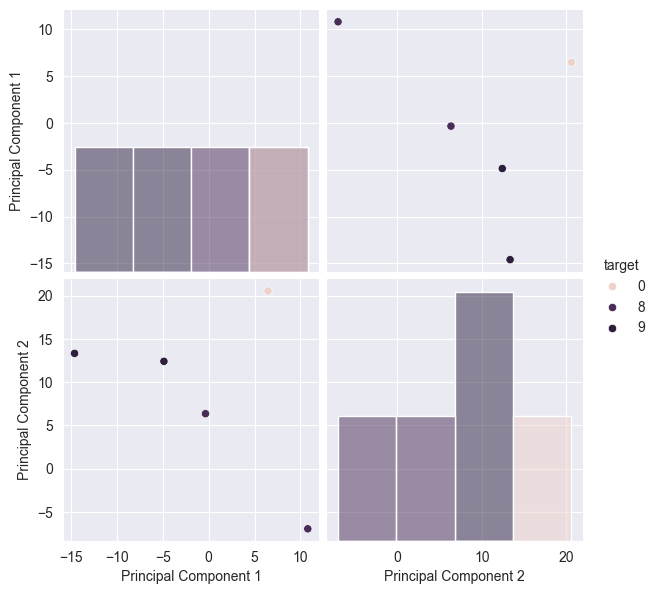

In [69]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA last five')

targets = [9, 0, 8, 9, 8]
colors = ['b', 'black', 'r', 'g', 'y']
for target, color in zip(targets, colors):
    ind = (last_five_digits['target'] == target)
    ax.scatter(last_five_digits.loc[ind, 'Principal Component 1']
               , last_five_digits.loc[ind, 'Principal Component 2']
               , c=color)
ax.legend(targets)

# scatter matrix for first five digits 
sns.pairplot(last_five_digits, hue='target', height=3, diag_kind='hist')
plt.show()

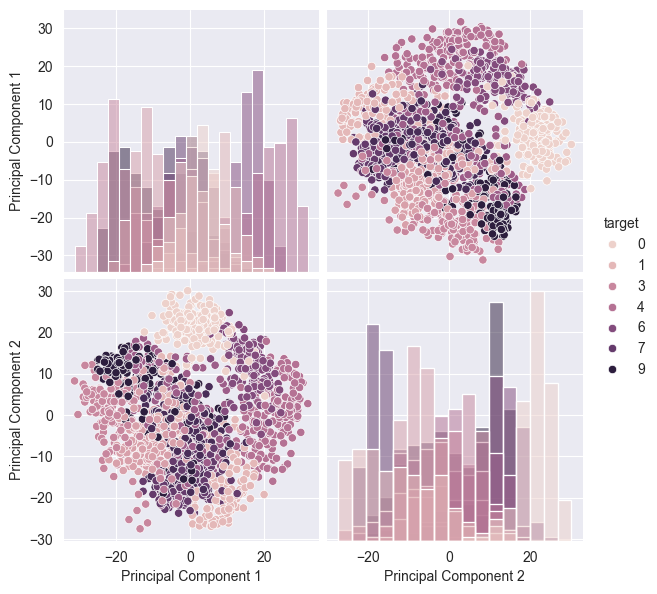

In [64]:
# scatter matrix by 2 components (PCA)
sns.pairplot(final_df, hue='target', height=3, diag_kind='hist')
plt.show()

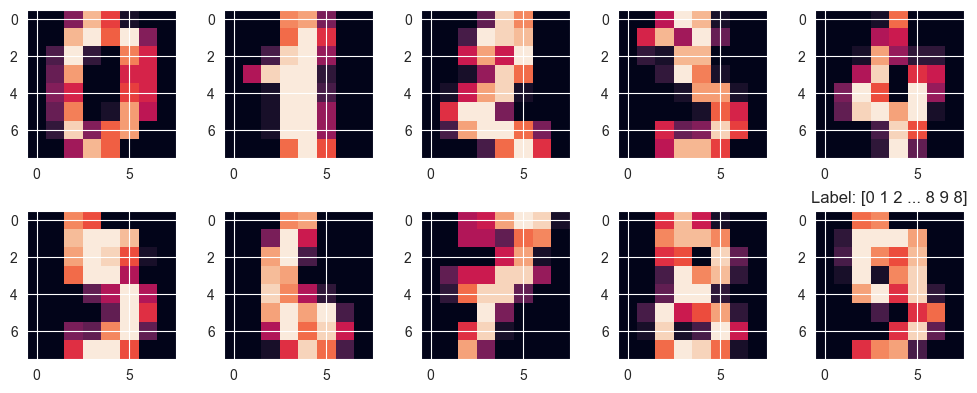

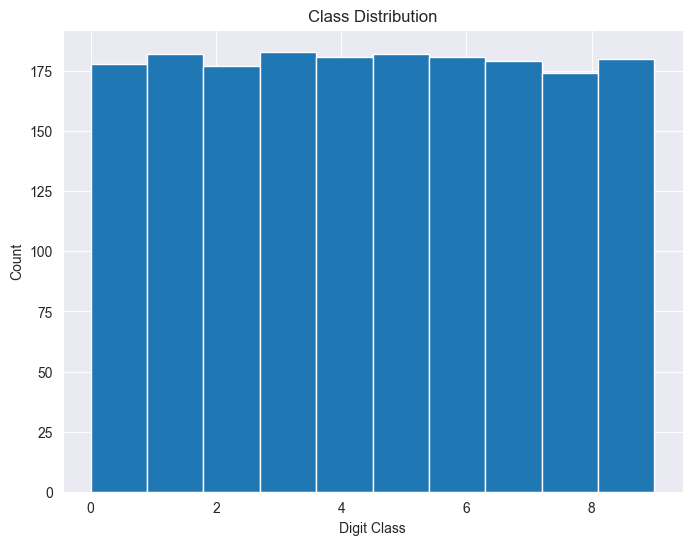

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i])
ax.set_title(f"Label: {digits.target}")
plt.tight_layout()
plt.show()

# class distribution
plt.figure(figsize=(8, 6))
plt.hist(digits.target, bins=10)
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<h1 style="color: green">Building a model using the k-nearest means method. Testing on
arbitrary dataset<h1>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [41]:
import numpy as np

X_new_sample = np.array([[3.0, 0.1, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 13.0, 6.0, 15.0, 4.0, 0.0, 0.0, 0.0,
                          2.0, 1.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 1.0, 0.2, 0.0, 0.0, 0.0, 0.0,
                          1.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.2, 8.0, 4.0, 5.0,
                          12.0, 8.0, 0.0, 0.0, 0.0, 7.0, 13.0, 13.0, 9.0, 0.4]])
print('shape of X_new_sample sample {}'.format(X_new_sample.shape))

X_new = np.array([[0.0, 0.5, 0.7, 0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0,
                   0.5, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.2, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.6, 0.0, 0.0, 0.6, 0.5,
                   0.4, 0.3, 0.2, 0.1]])
print('shape of X_new sample {}'.format(X_new.shape))

shape of X_new_sample sample (1, 64)
shape of X_new sample (1, 64)


<h1 style="color: green">Model prediction<h1>

In [42]:
prediction1 = knn.predict(X_new_sample)
print('prediction #1: {}'.format(prediction1))
print('predicted label #1: {}'.format(digits['target_names'][prediction1]))

prediction2 = knn.predict(X_new)
print('prediction #2: {}'.format(prediction2))
print('predicted label #2: {}'.format(digits['target_names'][prediction2]))

prediction #1: [3]
predicted label #1: [3]
prediction #2: [1]
predicted label #2: [1]


In [43]:
y_pred = knn.predict(X_test)
print('prediction for test set: \n{}'.format(y_pred))

prediction for test set: 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


<h1 style="color: green">Accuracy (model quality assessment)<h1>

In [44]:
print('accuracy of test set: {:.2f}'.format(np.mean(y_pred == y_test)))
print('accuracy of test set: {:.2f}'.format(knn.score(X_test, y_test)))

accuracy of test set: 0.98
accuracy of test set: 0.98


In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       0.98      1.00      0.99        44
           3       0.94      0.98      0.96        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      0.94      0.97        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.98      0.98      0.98       450


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  2  0  0  0  0 45  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


<Axes: >

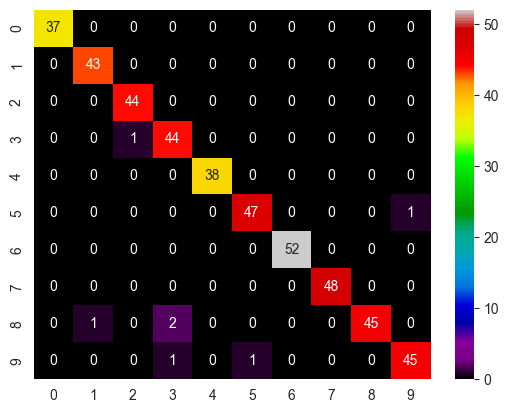

In [46]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion)

vis = sns.heatmap(confusion, annot=True, cmap='nipy_spectral')
vis

Функция load_digits в scikit-learn используется для загрузки набора данных, который представляет собой набор рукописных цифр. Изображения рукописных цифр содержатся в массиве. Каждый элемент этого массива представляет собой изображение, представленное матрицей числовых значений размером 8x8, соответствующих оттенкам серого, от белого со значением 0 до черного со значением 15.
digits.data: Этот атрибут содержит матрицу объектов, где каждая строка представляет изображение размером 8x8, сведенное в массив из 64 элементов.
digits.target: этот атрибут содержит целевые метки, которые представляют собой фактические значения цифр (от 0 до 9), соответствующие каждому изображению.
digits.images: этот атрибут содержит исходные изображения 8x8 в матричной форме.
Числовые значения, представленные изображениями, то есть целями, содержатся в массиве digit.targets.

X — матрица данных, часто называемая матрицей признаков. Он содержит изображения рукописных цифр размером 8x8 (сплющенные 64), где каждая строка представляет собой отдельное изображение. Каждое изображение преобразуется в массив, поэтому X представляет собой двумерный массив, где каждая строка соответствует изображению, а каждый столбец представляет значение пикселя.
y  — это массив целевых меток. Каждый элемент массива y соответствует фактическому цифровому значению (от 0 до 9) для соответствующего изображения в X. Другими словами, y содержит основные метки истинности для каждого изображения в X.

Визуализация дает более глубокое представление о наборе данных. Но становится невозможно визуализировать многомерные данные (в нашем случае 64 dimension).
PCA(principal component analysis/метод главных компонент) пригодится в этой ситуации для визуализации данных в нескольких измерениях.
Наиболее важным применением PCA является представление таблицы многомерных данных в виде меньшего набора переменных.
PCA находит линии, плоскости и гиперплоскости в K-мерном пространстве, которые максимально приближают данные в смысле метода наименьших квадратов. Линия или плоскость, представляющая собой аппроксимацию набора точек данных методом наименьших квадратов, делает отклонение координат на линии или плоскости максимально большим.

Мы разделили наш набор данных на обучающий набор (training set), чтобы
построить нашу модель, а также тестовый набор (test set), чтобы оценить, насколько
хорошо наша модель будет классифицировать новые, ранее незнакомые ей данные.
Мы выбрали алгоритм классификации k ближайших соседей, который генерирует
прогноз для новой точки данных, рассматривая ее ближайшего соседа(ей) в
обучающем наборе. Все это реализовано в классе KNeighborsClassifier, который
содержит алгоритм, строящий модель, а также алгоритм, который дает прогнозы,
используя построенную модель. Мы создали объект-экземпляр класса, задав
параметры. Затем мы построили модель, вызвав метод fit и передав обучающие
данные (X_train) и обучающие ответы (y_train) в качестве параметров. Мы оценили
качество модели с использованием метода score, который вычисляет правильность
модели. Мы применили метод score к тестовым данным и тестовым ответам и
обнаружили, что наша модель демонстрирует правильность около 98%. Достижение точности 98% означает, что  модель  правильно классифицирует рукописные цифры с высокой степенью точности.

Classification matrix(матрица путаницы) — это таблица, которая часто используется для описания производительности модели классификации (или «классификатора») на наборе тестовых данных, для которых известны истинные значения. Матрица путаницы является важным инструментом для оценки результатов прогнозирования, поскольку она позволяет легко понять и учесть последствия неверных прогнозов (confusion_matrix).
classification_report используется для измерения качества прогнозов алгоритма классификации.